In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q7: What products have been sold through card or mobile since X days?

In [24]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT i.item_name, tim.date, tr.trans_type ,SUM(f.quantity) as Quantity" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              " JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key "\
              " JOIN ecomdb_star_schema.trans_dim tr on tr.payment_key=f.payment_key "\
              " Where (tr.trans_type = 'card' or tr.trans_type = 'mobile' or tr.trans_type = 'cash') " \
              " and (tim.date> NOW() - INTERVAL '450 days')" \
              " GROUP BY (i.item_name,tim.date ,tr.trans_type)" \
              "Order by Quantity DESC "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('Gatorade Liberty Variety 12 oz',
  datetime.datetime(2021, 1, 19, 1, 3),
  'card',
  28),
 ('La Croix Sparkling Lemon 12 oz',
  datetime.datetime(2020, 12, 7, 1, 8),
  'card',
  22),
 ('Extra Variety Packs Sugar Free',
  datetime.datetime(2020, 12, 25, 7, 49),
  'card',
  22),
 ('Red Bull 16oz', datetime.datetime(2020, 12, 25, 5, 35), 'card', 21),
 ('Paper Bowls 20 oz Ultra Strong',
  datetime.datetime(2021, 5, 1, 6, 3),
  'card',
  21),
 ('Coke Classic 12 oz cans',
  datetime.datetime(2021, 7, 1, 19, 54),
  'card',
  21),
 ('Lysol Wipes 100 ct', datetime.datetime(2020, 12, 11, 9, 21), 'card', 21),
 ('Coke Zero Sugar 12 oz cans',
  datetime.datetime(2020, 12, 11, 10, 54),
  'card',
  21),
 ('Coffee-mate Original Powdered Creamer',
  datetime.datetime(2020, 12, 4, 21, 3),
  'card',
  20),
 ('K Cups Folgers Lively Columbian',
  datetime.datetime(2021, 1, 15, 16, 6),
  'card',
  20),
 ('Foam Coffee Cups - 08 ounce',
  datetime.datetime(2020, 12, 3, 12, 57),
  'card',
  20),
 ('Hershey 

In [25]:
df2 = pd.DataFrame(list(records), columns=['Item_name', 'Date' ,'Trans_type','Total_Quantity'])
df2

Item_name                Date  \
0                   Gatorade Liberty Variety 12 oz 2021-01-19 01:03:00   
1                   La Croix Sparkling Lemon 12 oz 2020-12-07 01:08:00   
2                   Extra Variety Packs Sugar Free 2020-12-25 07:49:00   
3                                    Red Bull 16oz 2020-12-25 05:35:00   
4                   Paper Bowls 20 oz Ultra Strong 2021-05-01 06:03:00   
...                                            ...                 ...   
21084             Hefty Supreme Foam Plates 9 inch 2020-12-19 03:32:00   
21085                   Clorox Disinfecting Wipes  2020-12-07 15:00:00   
21086  Nature Valley Sweet/Salty Peanut Bars       2020-12-16 09:11:00   
21087             Hefty Supreme Foam Plates 9 inch 2020-12-10 08:42:00   
21088             Hefty Supreme Foam Plates 9 inch 2020-12-09 20:44:00   

      Trans_type  Total_Quantity  
0           card              28  
1           card              22  
2           card              22  
3           card              21  
4           card              21  
...          ...             ...  
21084       card               1  
21085     mobile               1  
21086       card               1  
21087       card               1  
21088     mobile               1  

[21089 rows x 4 columns]

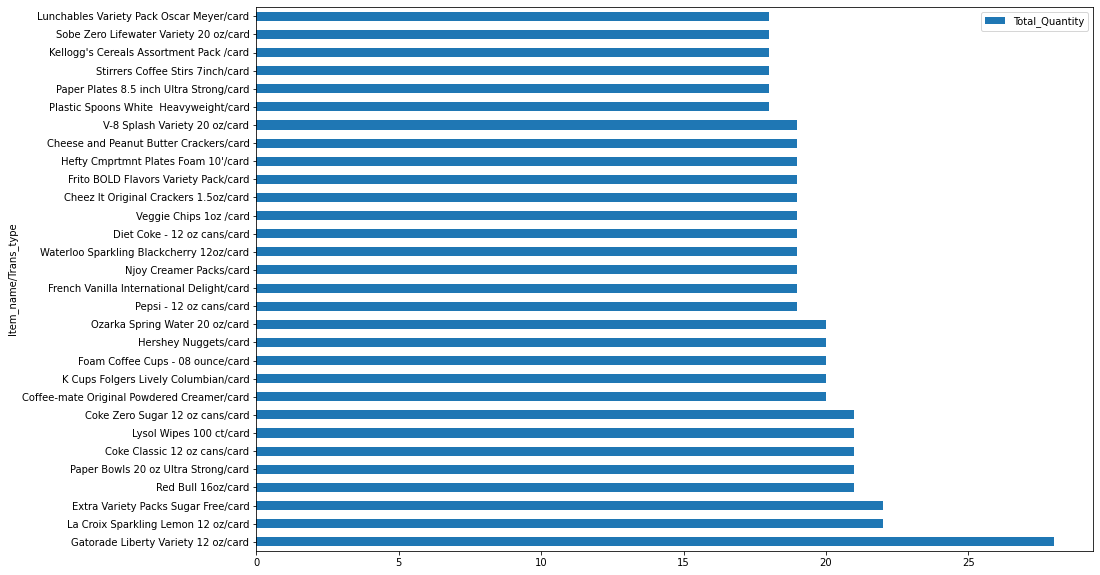

In [31]:
df2 = df2.groupby('Item_name').head(3)
df2= df2.head(30)
df2['Total_Quantity'] = df2['Total_Quantity'].astype('int64')
df2['Item_name/Trans_type'] = df2['Item_name'] +  '/' +df2['Trans_type']
fig = df2.plot.barh(x='Item_name/Trans_type', y='Total_Quantity', figsize=(15,10), rot=0)